### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.13.1'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:5])

[9 2 1 1 6]


In [0]:
trainYo = trainY

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [8]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

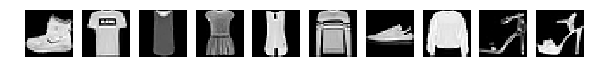

label for each of the above image: 
9 0 0 3 0 2 7 2 5 5


In [37]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 10, sharey=True,figsize=(10,20))

for i in range(0,10):
  ax[i].imshow(trainX[i],cmap='gray')
  ax[i].axis('off')
  
f.frameon=False
plt.show()

print('label for each of the above image: ')

for i in range(0,10):
  print(trainYo[i]),

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [10]:
trainX.shape

(60000, 28, 28)

In [11]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Execute the model using model.fit()

In [12]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
60000/60000 [==============================] - 1s 9us/sample - loss: 15.1255 - acc: 0.0538 - val_loss: 14.2723 - val_acc: 0.1125
Epoch 2/100
60000/60000 [==============================] - 0s 4us/sample - loss: 14.2678 - acc: 0.1122 - val_loss: 13.8040 - val_acc: 0.1393
Epoch 3/100
60000/60000 [==============================] - 0s 3us/sample - loss: 13.8326 - acc: 0.1369 - val_loss: 12.9301 - val_acc: 0.1923
Epoch 4/100
60000/60000 [==============================] - 0s 3us/sample - loss: 12.9670 - acc: 0.1902 - val_loss: 12.8455 - val_acc: 0.1979
Epoch 5/100
60000/60000 [==============================] - 0s 3us/sample - loss: 12.8804 - acc: 0.1955 - val_loss: 12.8711 - val_acc: 0.1969
Epoch 6/100
60000/60000 [==============================] - 0s 3us/sample - loss: 12.8796 - acc: 0.1964 - val_loss: 13.3095 - val_acc: 0.1695
Epoch 7/100
60000/60000 [==============================]

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model1 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [14]:
model1.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 0s 6us/sample - loss: 3.2063 - acc: 0.0718 - val_loss: 13.6401 - val_acc: 0.0719
Epoch 2/100
60000/60000 [==============================] - 0s 3us/sample - loss: 2.8699 - acc: 0.0948 - val_loss: 11.7936 - val_acc: 0.0741
Epoch 3/100
60000/60000 [==============================] - 0s 3us/sample - loss: 2.5931 - acc: 0.1238 - val_loss: 9.4453 - val_acc: 0.0889
Epoch 4/100
60000/60000 [==============================] - 0s 3us/sample - loss: 2.3649 - acc: 0.1635 - val_loss: 7.2989 - val_acc: 0.1216
Epoch 5/100
60000/60000 [==============================] - 0s 3us/sample - loss: 2.1761 - acc: 0.2094 - val_loss: 5.7400 - val_acc: 0.1694
Epoch 6/100
60000/60000 [==============================] - 0s 3us/sample - loss: 2.0192 - acc: 0.2611 - val_loss: 4.7099 - val_acc: 0.2218
Epoch 7/100
60000/60000 [==============================] - 0s 3us/sample - loss: 1.8883 - acc: 0.3122 - val_loss: 

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model2.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 0s 7us/sample - loss: 2.8004 - acc: 0.0892 - val_loss: 11.0249 - val_acc: 0.1357
Epoch 2/100
60000/60000 [==============================] - 0s 3us/sample - loss: 2.5320 - acc: 0.1309 - val_loss: 9.1372 - val_acc: 0.1633
Epoch 3/100
60000/60000 [==============================] - 0s 3us/sample - loss: 2.3169 - acc: 0.1890 - val_loss: 7.7145 - val_acc: 0.1925
Epoch 4/100
60000/60000 [==============================] - 0s 3us/sample - loss: 2.1440 - acc: 0.2485 - val_loss: 6.5866 - val_acc: 0.2218
Epoch 5/100
60000/60000 [==============================] - 0s 3us/sample - loss: 2.0036 - acc: 0.3002 - val_loss: 5.6968 - val_acc: 0.2508
Epoch 6/100
60000/60000 [==============================] - 0s 3us/sample - loss: 1.8877 - acc: 0.3435 - val_loss: 4.9982 - val_acc: 0.2799
Epoch 7/100
60000/60000 [==============================] - 0s 3us/sample - loss: 1.7909 - acc: 0.3801 - val_loss: 4

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model3 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model3.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model3.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [22]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [23]:
model3.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 0s 8us/sample - loss: 2.5523 - acc: 0.0879 - val_loss: 2.4930 - val_acc: 0.0980
Epoch 2/100
60000/60000 [==============================] - 0s 4us/sample - loss: 2.4905 - acc: 0.0834 - val_loss: 2.4439 - val_acc: 0.0976
Epoch 3/100
60000/60000 [==============================] - 0s 4us/sample - loss: 2.4427 - acc: 0.0788 - val_loss: 2.4052 - val_acc: 0.0976
Epoch 4/100
60000/60000 [==============================] - 0s 4us/sample - loss: 2.4052 - acc: 0.0759 - val_loss: 2.3743 - val_acc: 0.0996
Epoch 5/100
60000/60000 [==============================] - 0s 4us/sample - loss: 2.3753 - acc: 0.0742 - val_loss: 2.3493 - val_acc: 0.0998
Epoch 6/100
60000/60000 [==============================] - 0s 4us/sample - loss: 2.3510 - acc: 0.0736 - val_loss: 2.3287 - val_acc: 0.1000
Epoch 7/100
60000/60000 [==============================] - 0s 4us/sample - loss: 2.3311 - acc: 0.0730 - val_loss: 2.